In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import subprocess
import os
import imagecodecs

/home/eugene/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Path to your original TIFF file
input_image = 'input_singleband.TIF'
original_size = os.path.getsize(input_image)

# Quality levels and formats
qualities = [99, 98, 97, 96, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40] # range 5 until 10
formats = ['JP2', 'JXL'] 

# Dictionary to store PSNR and SSIM values
metrics = {f: {'PSNR': [], 'SSIM': [], 'BPP': []} for f in formats}

In [3]:
def convert_image(input_path, output_path, format, q):
    if format == "JP2":
        # TODO ADD METADATA HERE CONVERSION
        png_path = output_path.split(".")[0] + '.png'
        os.system(f'gdal_translate -of PNG {input_path} {png_path}')
        os.system(f'opj_compress -q {q} -i {png_path} -o {output_path}')
        os.remove(png_path)
    elif format == "JXL":
        png_path = output_path.split(".")[0] + '.png'
        os.system(f'gdal_translate -of PNG {input_path} {png_path}')
        os.system(f'./cjxl -q {q} {png_path} {output_path} --quiet')
        os.remove(png_path)

def load_and_compare(original_path, compared_path):
        original = imagecodecs.imread(original_path)
        compared = imagecodecs.imread(compared_path)

        if compared.ndim == 2:  # It's a grayscale image
            height, width = compared.shape
        elif compared.ndim == 3:  # It's a color image
            height, width, channels = compared.shape

        original = np.array(original)
        compared = np.array(compared)
        size = os.path.getsize(compared_path)
        psnr_value = psnr(original, compared)
        ssim_value = ssim(original, compared, data_range=255, full=True)
        bpp = ( size * 8 ) / (width*height)
        return psnr_value, ssim_value, bpp

In [4]:
# Convert images
for format in formats:
    for quality in qualities:
        output_path = f'output_{quality}.{format.lower()}'
        convert_image(input_image, output_path, format, quality)

Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_99.jp2
encode time: 6034 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_98.jp2
encode time: 6043 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_97.jp2
encode time: 6077 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_96.jp2
encode time: 5933 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_95.jp2
encode time: 6121 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_90.jp2
encode time: 5933 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_85.jp2
encode time: 5791 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_80.jp2
encode time: 6032 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_75.jp2
encode time: 5943 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_70.jp2
encode time: 5896 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_65.jp2
encode time: 5772 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_60.jp2
encode time: 5693 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_55.jp2
encode time: 5729 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_50.jp2
encode time: 5732 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_45.jp2
encode time: 5775 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_40.jp2
encode time: 5565 ms 
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6279, 6563
0...10...20...30...40...50...60...70...80...90...100 - done.
Inpu

In [5]:
# Calculate metrics
for format in formats:
    for quality in qualities:
        output_path = f'output_{quality}.{format.lower()}'
        psnr_value, ssim_value, bpp = load_and_compare(input_image, output_path)
        metrics[format]['PSNR'].append(psnr_value)
        metrics[format]['SSIM'].append(ssim_value[0])
        metrics[format]['BPP'].append(bpp)

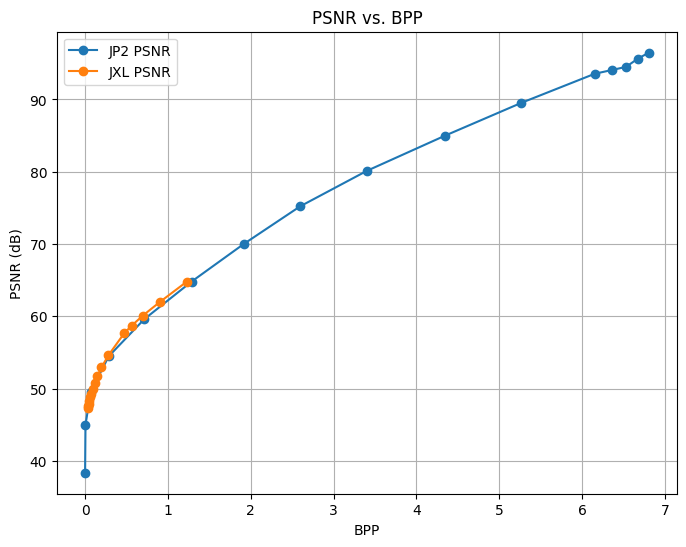

In [6]:
# PSNR vs. BPP Plot
plt.figure(figsize=(8, 6))
for format in formats:
    plt.plot(metrics[format]['BPP'], metrics[format]['PSNR'], marker='o', label=f'{format} PSNR')
plt.xlabel('BPP')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs. BPP')
plt.legend()
plt.grid(True)
plt.show()


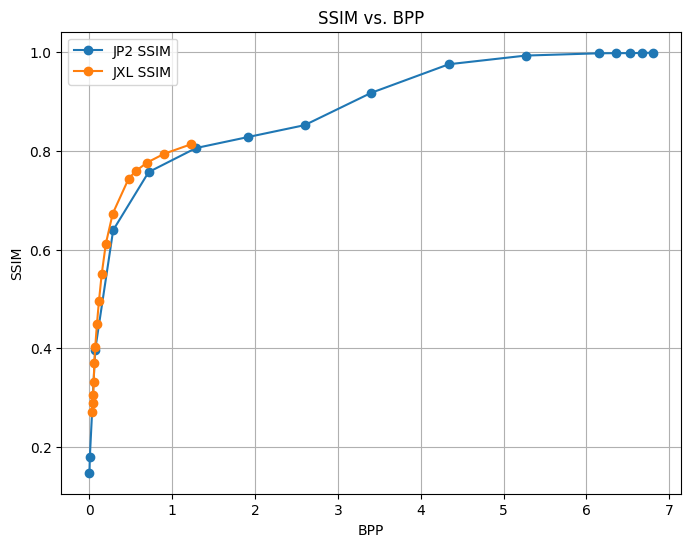

In [7]:
# PSNR vs. BPP Plot
plt.figure(figsize=(8, 6))
for format in formats:
    plt.plot(metrics[format]['BPP'], metrics[format]['SSIM'], marker='o', label=f'{format} SSIM')
plt.xlabel('BPP')
plt.ylabel('SSIM')
plt.title('SSIM vs. BPP')
plt.legend()
plt.grid(True)
plt.show()

# METRIC VS BPP
# BPP = size (bit) / (w*h)